In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import curve_fit
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

<IPython.core.display.Javascript object>


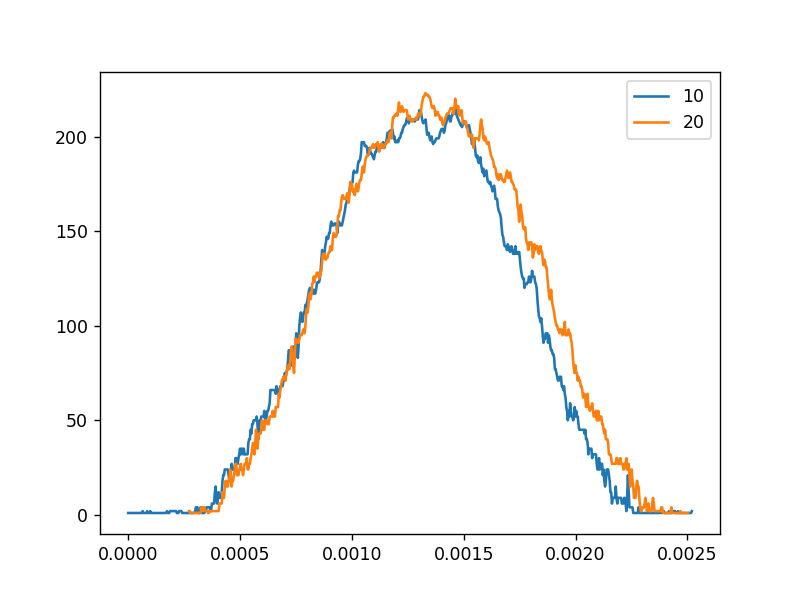

In [3]:
%matplotlib notebook
profile_1 = np.loadtxt('brightness_1.txt')
profile_2 = np.loadtxt('brightness_2.txt')
l_1 = np.shape(profile_1)[0]
l_2 = np.shape(profile_2)[0]
x_1 = 3.4e-6*np.arange(l_1)
x_2 = 3.4e-6*(np.arange(l_2)+80)
for i in range(1):
    #fit, cov = curve_fit(gauss, x, profile[:,i])
    plt.plot(x_1, profile_1[:,i], label='1'+str(i))
    plt.plot(x_2, profile_2[:,i], label='2'+str(i))
    #plt.plot(x, gaussian(x, *fit))
    #print(fit, cov)
    #print(i, fit)
plt.legend()

In [5]:
w0 = symbols('omega_0', positive=True)

In [6]:
lmbd = 850e-9
z = symbols('z', positive=True)
a = symbols('a', positive=True)#lmbd / pi#
w = w0*sqrt(1+a**2*z**2/w0**4)
w

omega_0*sqrt(a**2*z**2/omega_0**4 + 1)

In [7]:
#w = w.subs(z, 1)
w_prime = w.diff(w0)
w_prime_exp = lambdify(w0, w_prime, 'numpy')
w_prime

-2*a**2*z**2/(omega_0**4*sqrt(a**2*z**2/omega_0**4 + 1)) + sqrt(a**2*z**2/omega_0**4 + 1)

In [8]:
w0_opt = solve(w_prime, w0)[0]
w0_opt

sqrt(a)*sqrt(z)

In [9]:
w.subs(w0, w0_opt)

sqrt(2)*sqrt(a)*sqrt(z)

In [10]:
w_opt = float(w0_opt)
lam = 850e-9
x = np.linspace(0,1,1000)

plt.plot(x, w_opt*np.sqrt(1+(lam*x/np.pi/w_opt**2)**2))
# w_opt/=4
# plt.plot(x, w_opt*np.sqrt(1+(lam*x/np.pi/w_opt**2)**2))


TypeError: can't convert expression to float

In [ ]:
float(w0_opt)

In [11]:
chars = ['0', '8', '1', '9']
with open('./tmp(lab)/only-8', 'wb') as f:
    file_size = 65536
    block_length = 16534
    blocks = file_size//block_length
    for i in range(blocks):
        f.write('8'.encode() * block_length)
    f.write('8'.encode() * (file_size%block_length))

In [12]:
import random
chars = ['0', '1', '8', '9']
l = 4096
with open('./tmp(lab)/random-'+str(l), 'wb') as f:
    file_size = 65536
    block_length = l
    seq_length = file_size//block_length
    for i in range(seq_length):
        char = random.choice(chars)
        f.write(char.encode() * block_length)

In [13]:
chars = ['0', '8']
with open('./tmp(lab)/0-to-8', 'wb') as f:
    file_size = 1024*1024
    block_length = 8192
    blocks = file_size//block_length
    for i in range(blocks):
        f.write(chars[i%2].encode() * block_length)
    f.write(chars[(i+1)%2].encode() * (file_size%block_length))
    

In [14]:
1024*1024//16534

63

In [15]:
with open('./tmp(lab)/patt-response', 'r') as f:
    resp = f.read()
with open('./tmp(lab)/patt', 'r') as f:
    req = f.read()


In [16]:
cor = 0
for i in range(len(req)):
    if resp[i]=='1' or resp[i]=='3':
        if req[i]=='0' or req[i]=='8':
            cor+=1
        else:
            cor-=1
print(cor/len(req))

0.0180511474609375


<IPython.core.display.Javascript object>


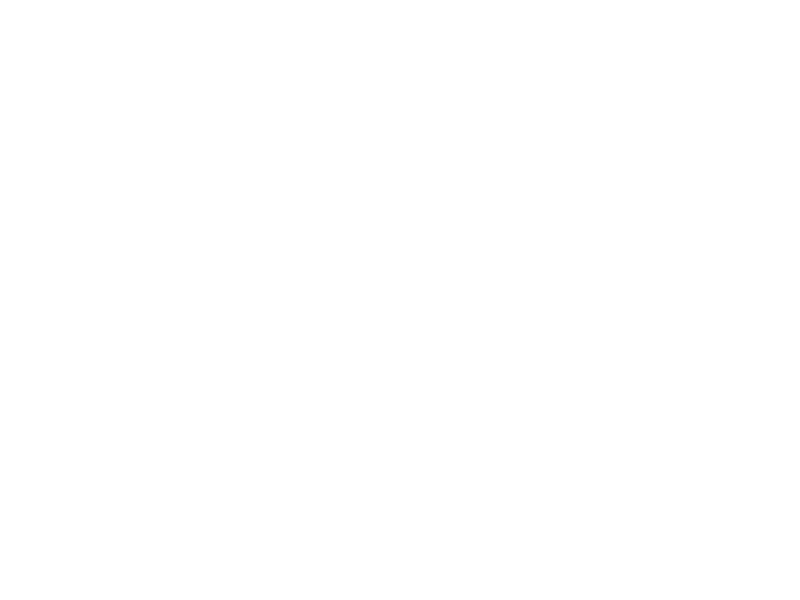

In [17]:
with open('./tmp(lab)/output', 'r') as f:
    out = list(map(int, list(f.read())))

data = np.zeros((65536))
for file in range(400):
    data = data + out[file*65536:(file+1)*65536]

import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(np.arange(65536), data, '.')
plt.axvline(x = 100, color='green')
plt.axvline(x = 100+16384, color='green')
plt.axvline(x = 100+16384*2, color='green')
plt.axvline(x = 100+16384*3, color='green')

<IPython.core.display.Javascript object>


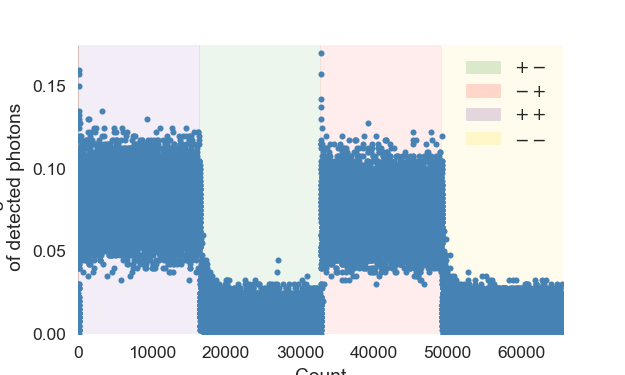

In [20]:
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = 'white'
with open('./tmp(lab)/4-blocks', 'r') as f:
    in_data = list(map(int, list(f.read())))
np.save('./tmp(lab)/in_data-16384.npy', in_data)

with open('./tmp(lab)/output_1', 'r') as f:
    out = list(map(int, list(f.read())))

data = np.zeros((65536))
for file in range(400):
    data = data + out[file*65536:(file+1)*65536]
np.save('./tmp(lab)/data-16384.npy', data)

import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure(figsize=(5, 3))
plt.plot(np.arange(65536), data/400, '.', color='steelblue')
c = {0:'g',1:'r',8:'indigo',9:'gold'}#0,1,8,9
lbl = {0: r'$+-$', 1: r'$-+$', 8: r'$++$', 9: r'$--$'}
chars = [0,1,8,9]
for x_0 in range(4):
    plt.axvspan(0,1, color = c[chars[x_0]], alpha = 0.15, label = str(lbl[chars[x_0]]))
    
for x_0 in range(65536//16384):
    plt.axvspan(x_0*16384,(x_0+1)*16384, color = c[in_data[x_0*16384]], alpha = 0.07)
plt.xlim(0, 16384*4)
plt.ylim(0)
plt.legend(loc='upper right')
plt.xlabel('Count')
plt.yticks(np.linspace(0, 0.15, 4))
plt.ylim([0, 0.175])
plt.ylabel('Average number\n of detected photons')
plt.savefig('4-blocks.jpg', bbox_inches='tight')

In [22]:
set(out)

{0, 1}

# Рандомные блоки длиной 16384 бит

In [19]:
with open('./tmp(lab)/data-16384.npy', 'r') as f:
    out = list(map(int, list(f.read())))

with open('./tmp(lab)/in_data-16384', 'r') as f:
    in_data = list(map(int, list(f.read())))

data = np.zeros((65536))
for file in range(400):
    data = data + out[file*65536:(file+1)*65536]

ValueError: invalid literal for int() with base 10: '“'

# Рандомные блоки длиной 512 бит

In [23]:
with open('./tmp(lab)/random-512-output', 'r') as f:
    out = list(map(int, list(f.read())))

with open('./tmp(lab)/random-512', 'r') as f:
    in_data = list(map(int, list(f.read())))
np.save('./tmp(lab)/in_data-random-512.npy', in_data)

data = np.zeros((65536))
for file in range(400):
    data = data + out[file*65536:(file+1)*65536]
np.save('./tmp(lab)/data-random-512.npy', data)

In [26]:
set(out)

{0, 1}

In [24]:
in_data = np.array(in_data)

<IPython.core.display.Javascript object>


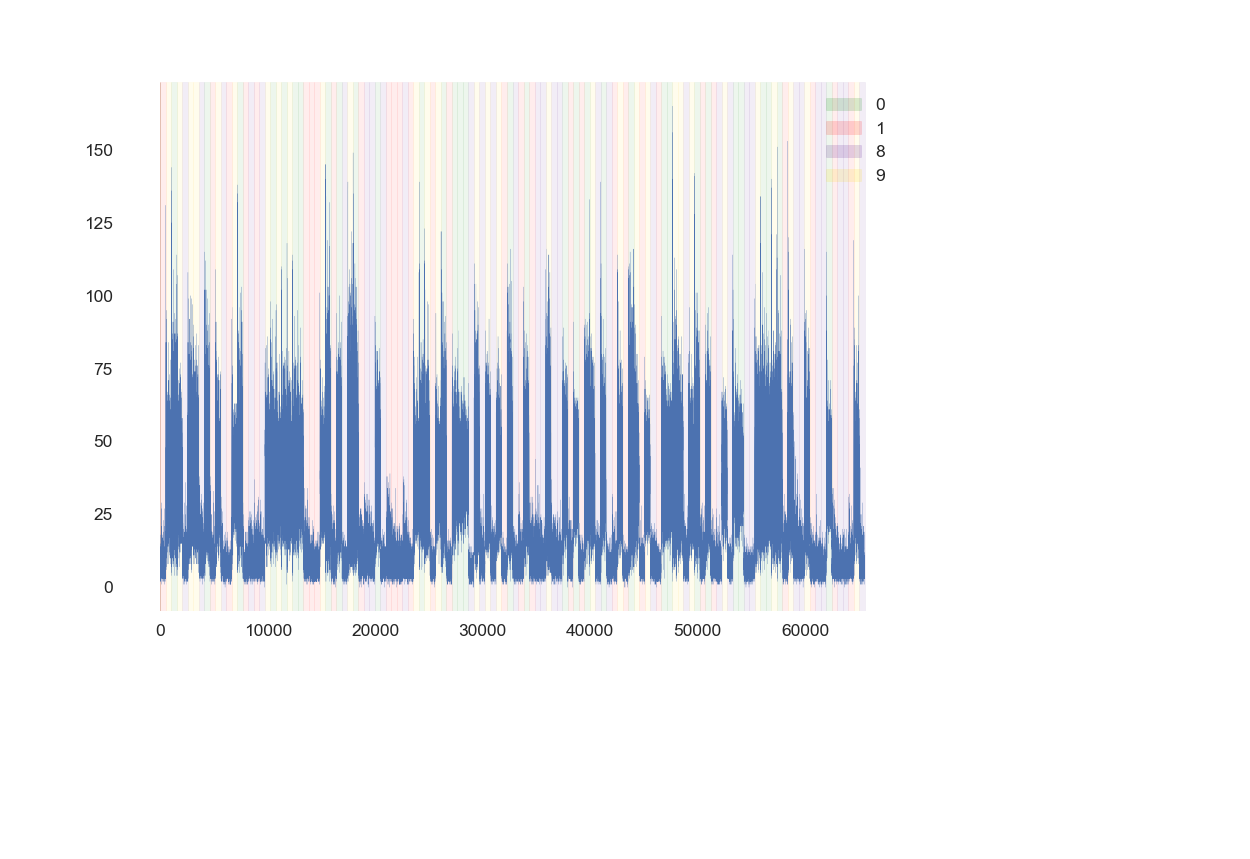

In [25]:
import matplotlib.pyplot as plt
c = {0:'g',1:'r',8:'indigo',9:'gold'}#0,1,8,9
chars = [0,1,8,9]
%matplotlib notebook
for x_0 in range(4):
    plt.axvspan(0,1, color = c[chars[x_0]], alpha = 0.15, label = str(chars[x_0]))
    
for x_0 in range(65536//512):
    plt.axvspan(x_0*512,(x_0+1)*512, color = c[in_data[x_0*512]], alpha = 0.07)

plt.plot(np.arange(65536), data, linewidth=0.1)

#plt.xlim(2000, 4000)
plt.legend(loc='upper right')

In [ ]:
#import matplotlib.pyplot as plt
#%matplotlib notebook
data = np.reshape(out, (400, -1))
s = np.take(data,np.random.permutation(data.shape[0]),axis=0,out=data)
data_1 = s[:100]
data_2 = s[100:200]
data_3 = s[200:300]
data_4 = s[300:]
plt.figure()
plt.plot(np.arange(65536), np.sum(np.reshape(data_1, (100, -1)), axis=0)/100, '--.', linewidth=1)
plt.plot(np.arange(65536), np.sum(np.reshape(data_2, (100, -1)), axis=0)/100, '.', linewidth=0.8)
plt.plot(np.arange(65536), np.sum(np.reshape(data_3, (100, -1)), axis=0)/100, '.', linewidth=0.6)
plt.plot(np.arange(65536), np.sum(np.reshape(data_4, (100, -1)), axis=0)/100, '.', linewidth=0.4)
plt.xlim(11600, 11650)
plt.grid()

In [ ]:
#import matplotlib.pyplot as plt
#%matplotlib notebook
data = np.reshape(out, (400, -1))
s = np.take(data,np.random.permutation(data.shape[0]),axis=0,out=data)
data_1 = s[:200]
data_1 = np.sum(np.reshape(data_1, (200, -1)), axis=0)/200
data_2 = s[200:]
data_2 = np.sum(np.reshape(data_2, (200, -1)), axis=0)/200
plt.figure()

plt.plot(np.arange(65536), np.min(np.array([data_1, data_2]), axis=0), '--.', linewidth=1)
plt.plot(np.arange(65536), np.max(np.array([data_1, data_2]), axis=0), '--.', linewidth=0.8)
plt.xlim(11600, 11650)
plt.grid()

In [ ]:
plt.figure(figsize=(8,4))
plt.title('512')
datadata = data[11830: 11830+400]
fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='single stack')

datadata = np.mean(data[in_data==8].reshape(-1,512), axis=0)[95: 95+400]
fftdat = np.fft.rfft(datadata)
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='full time avarage 8 ')
plt.grid()

datadata = np.mean(data[in_data==1].reshape(-1,512), axis=0)[95: 95+400]
fftdat = np.fft.rfft(datadata)
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='full time avarage 1')

plt.legend()

plt.xlabel(r'$\nu, \Delta t^{-1}$')
plt.ylabel(r'$|\mathcal{F}[f]|$')
#
#datadata = data[13900:13900+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', c='red')
#
#datadata = data[10300:10300+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--')

#plt.yscale('log')

In [ ]:
nu_512, fft_512 = np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0]

<IPython.core.display.Javascript object>


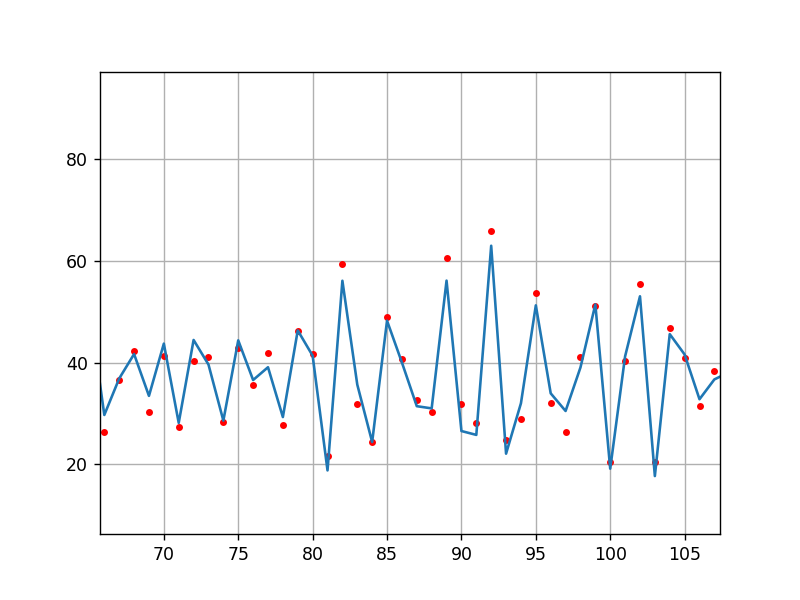

In [459]:
plt.figure()





plt.plot(datadata, '.', c='red')
fftdat = np.fft.rfft(datadata)
fftdat_new = fftdat*0
fftdat_new[0] = fftdat[0]

cut = 2 / 100
area = 2

for i in range(1, len(fftdat)-1):
    if np.abs(fftdat)[i]/np.abs(fftdat)[0] > cut:
        fftdat_new[i-area:i+area+1] = fftdat[i-area:i+area+1]

plt.plot(np.fft.irfft(fftdat_new))


# datadata = data[10300:10300+400]
# fftdat = np.fft.rfft(datadata)



# plt.plot(datadata, '.', c='blue')
# fftdat = np.fft.rfft(datadata)
# fftdat_new = fftdat*0
# fftdat_new[0] = fftdat[0]
# plt.plot(np.fft.irfft(fftdat_new))

plt.grid()

In [ ]:
## plt.figure()
datadata = np.mean(data[in_data==9].reshape(-1,128), axis=0)
fftdat = np.fft.rfft(datadata)
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--')
plt.grid()
#
#datadata = data[13900:13900+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', c='red')
#
#datadata = data[10300:10300+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--')

#plt.yscale('log')

<IPython.core.display.Javascript object>


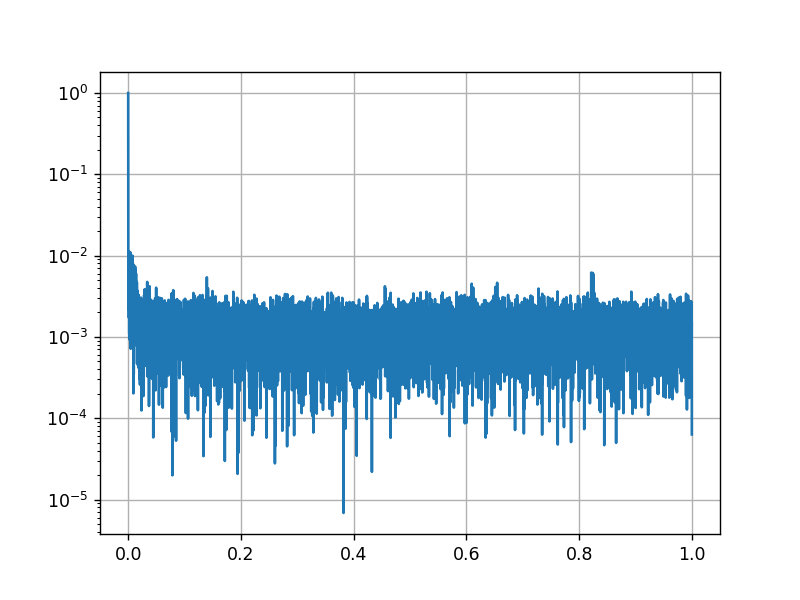

In [401]:
plt.figure()
datadata = (data[in_data==0])[10:-10]
fftdat = np.fft.rfft(datadata)
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0])
plt.grid()
#
#datadata = data[13900:13900+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', c='red')
#
#datadata = data[10300:10300+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--')

plt.yscale('log')

In [389]:
data.shape

(65536,)

<IPython.core.display.Javascript object>


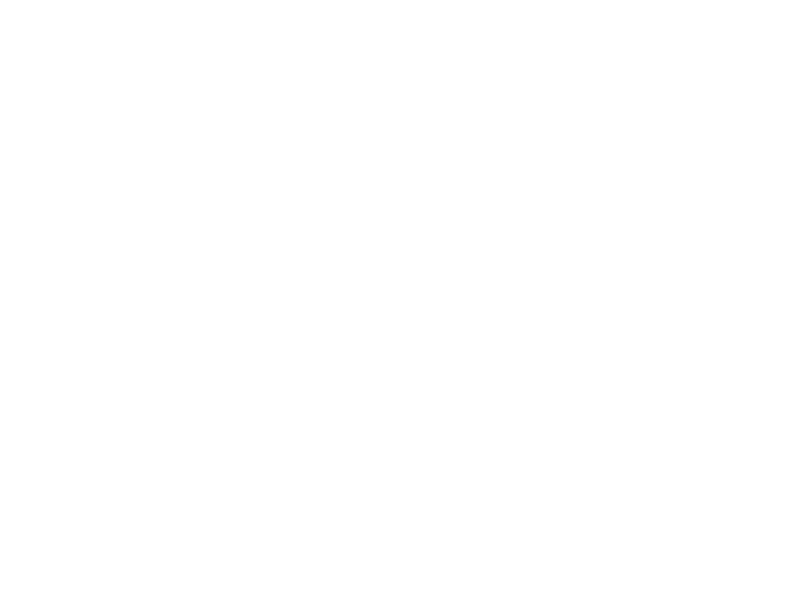

IndexError: tuple index out of range

In [501]:
plt.figure()
datadata = np.mean(data[in_data==9].reshape(-1,), axis=0)
fftdat = np.fft.rfft(datadata)
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0])
plt.grid()
#
#datadata = data[13900:13900+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', c='red')
#
#datadata = data[10300:10300+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--')

#plt.yscale('log')

<IPython.core.display.Javascript object>


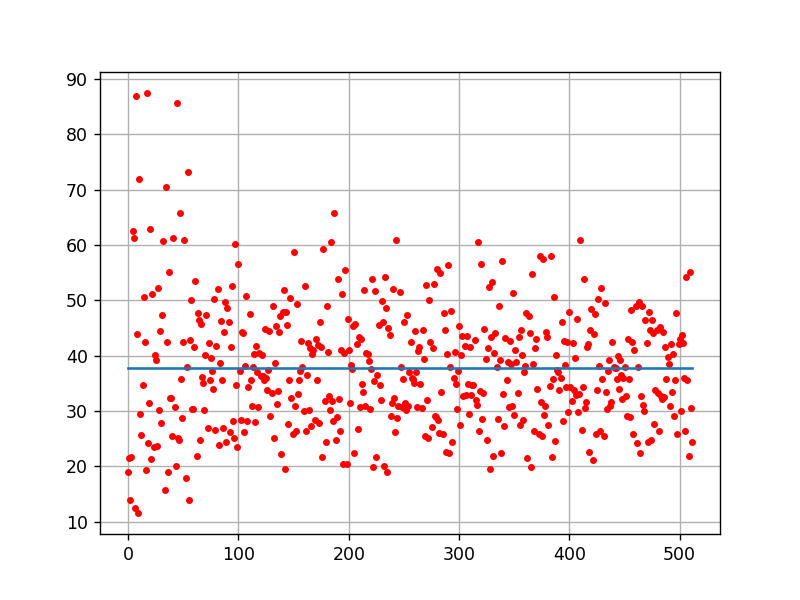

In [377]:
plt.figure()





plt.plot(datadata, '.', c='red')
fftdat = np.fft.rfft(datadata)
fftdat_new = fftdat*0
fftdat_new[0] = fftdat[0]
plt.plot(np.fft.irfft(fftdat_new))


# datadata = data[10300:10300+400]
# fftdat = np.fft.rfft(datadata)



# plt.plot(datadata, '.', c='blue')
# fftdat = np.fft.rfft(datadata)
# fftdat_new = fftdat*0
# fftdat_new[0] = fftdat[0]
# plt.plot(np.fft.irfft(fftdat_new))

plt.grid()

# Рандомные блоки длиной 128 бит

In [27]:
with open('./tmp(lab)/random-128-output', 'r') as f:
    out = list(map(int, list(f.read())))

with open('./tmp(lab)/random-128', 'r') as f:
    in_data = list(map(int, list(f.read())))
np.save('./tmp(lab)/in_data-random-128.npy', in_data)

data = np.zeros((65536))
for file in range(400):
    data = data + out[file*65536:(file+1)*65536]

np.save('./tmp(lab)/data-random-128.npy', data)

In [28]:
set(out)

{0, 1}

<IPython.core.display.Javascript object>


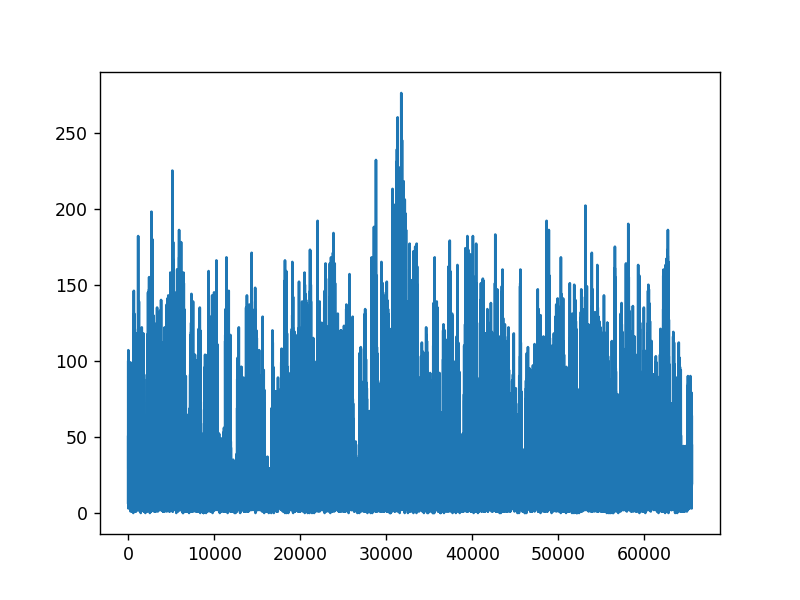

In [69]:
%matplotlib notebook
plt.plot(data)

In [484]:
in_data = np.array(in_data)

<IPython.core.display.Javascript object>


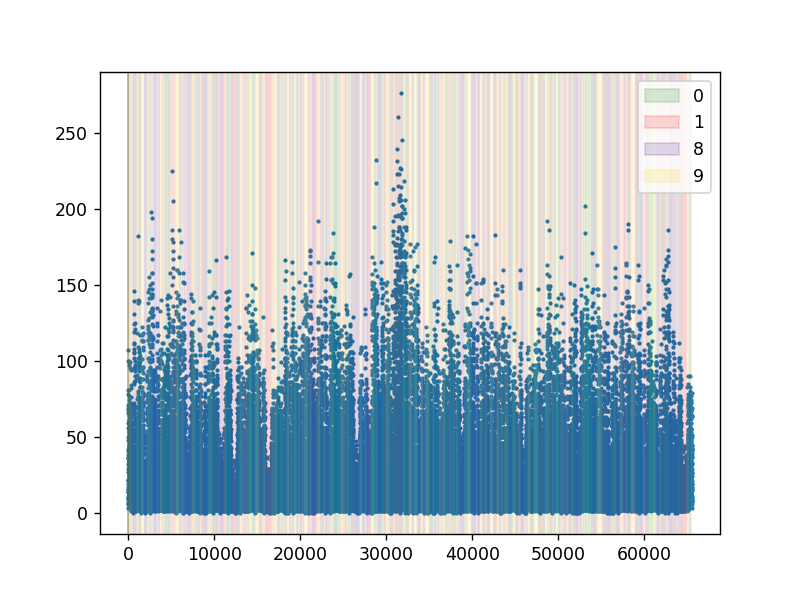

In [162]:
import matplotlib.pyplot as plt
c = {0:'g',1:'r',8:'indigo',9:'gold'}#0,1,8,9
chars = [0,1,8,9]
%matplotlib notebook
plt.scatter(np.arange(65536), data, s=2)

for x_0 in range(4):
    plt.axvspan(0,1, color = c[chars[x_0]], alpha = 0.15, label = str(chars[x_0]))
    
for x_0 in range(65536//128):
    plt.axvspan(x_0*128,(x_0+1)*128, color = c[in_data[x_0*128]], alpha = 0.05)
#plt.xlim(0, 2048)
plt.legend(loc='upper right')

<IPython.core.display.Javascript object>


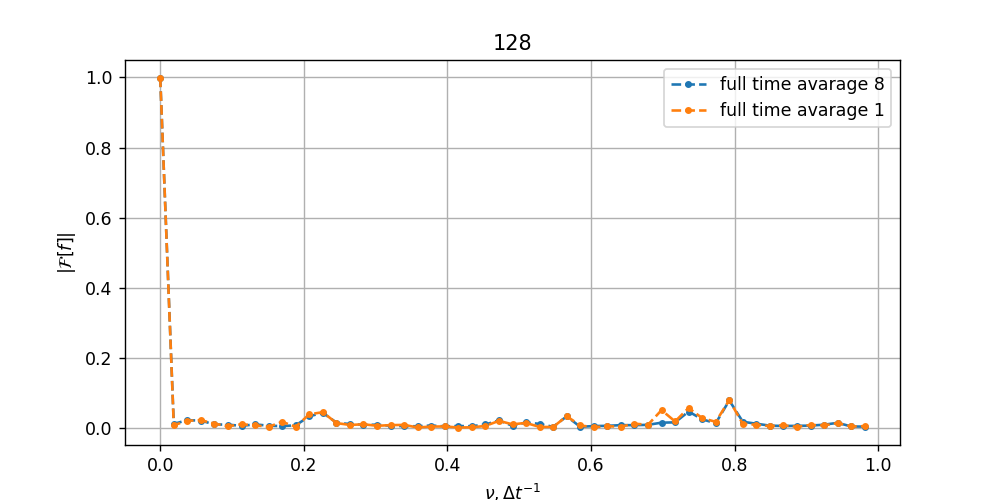

Text(0, 0.5, '$|\\mathcal{F}[f]|$')

In [500]:
plt.figure(figsize=(8,4))
plt.title('128')
#datadata = data[11830: 11830+400]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='single stack')

datadata = np.mean(data[in_data==8].reshape(-1,128), axis=0)[15: 120]
fftdat = np.fft.rfft(datadata)
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='full time avarage 8')
plt.grid()

datadata = np.mean(data[in_data==1].reshape(-1,128), axis=0)[15: 120]
fftdat = np.fft.rfft(datadata)
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='full time avarage 1')

plt.legend()

plt.xlabel(r'$\nu, \Delta t^{-1}$')
plt.ylabel(r'$|\mathcal{F}[f]|$')
#
#datadata = data[13900:13900+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', c='red')
#
#datadata = data[10300:10300+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--')

#plt.yscale('log')

<IPython.core.display.Javascript object>


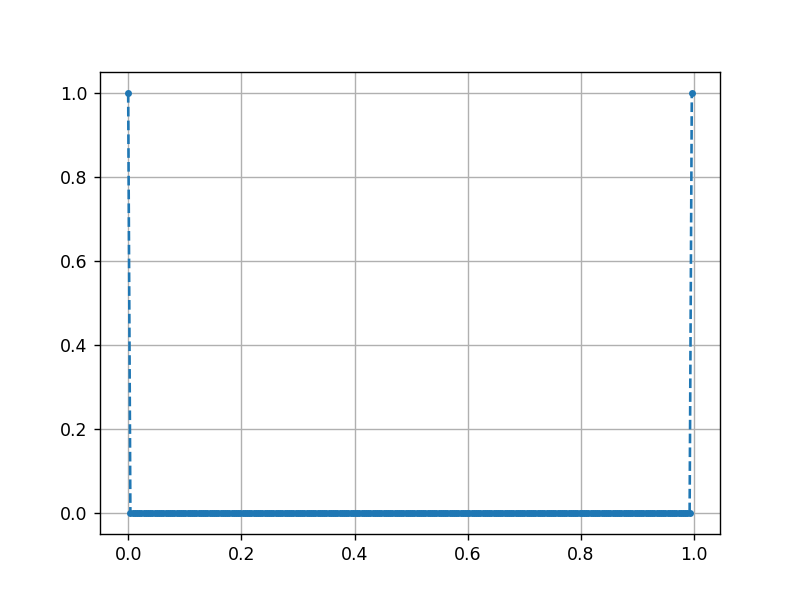

In [497]:
datadata = np.arange(512)%2
plt.figure()
fftdat = np.fft.rfft(datadata)
plt.grid()
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='full time avarage 8')

In [489]:
nu_128 =  np.arange(len(fftdat))/len(fftdat)
fft_128 =  np.abs(fftdat)/np.abs(fftdat)[0]

<IPython.core.display.Javascript object>


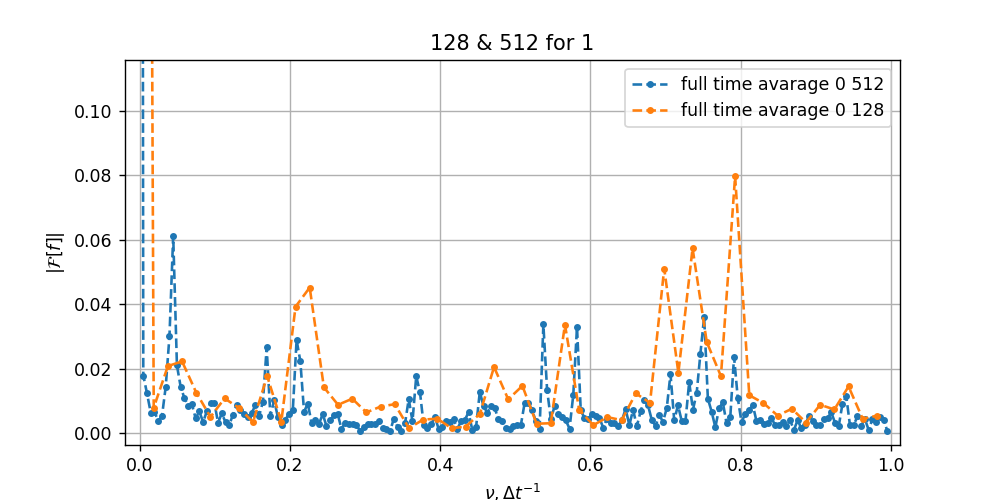

Text(0, 0.5, '$|\\mathcal{F}[f]|$')

In [490]:
plt.figure(figsize=(8,4))
plt.title('128 & 512 for 1')
#datadata = data[11830: 11830+400]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='single stack')


plt.plot(nu_512, fft_512,'.--', label='full time avarage 0 512')
plt.grid()



plt.plot(nu_128, fft_128,'.--', label='full time avarage 0 128')

plt.legend()

plt.xlabel(r'$\nu, \Delta t^{-1}$')
plt.ylabel(r'$|\mathcal{F}[f]|$')
#
#datadata = data[13900:13900+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', c='red')
#
#datadata = data[10300:10300+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--')

#plt.yscale('log')

<IPython.core.display.Javascript object>


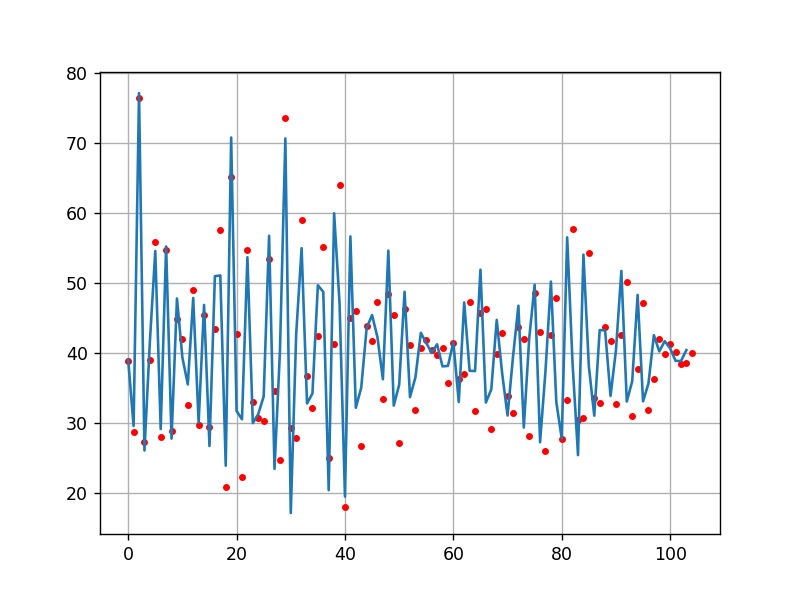

In [468]:
plt.figure()





plt.plot(datadata, '.', c='red')
fftdat = np.fft.rfft(datadata)
fftdat_new = fftdat*0
fftdat_new[0] = fftdat[0]

cut = 1 / 200
area = 2

for i in range(1, len(fftdat)-1):
    if np.abs(fftdat)[i]/np.abs(fftdat)[0] > cut:
        fftdat_new[i-area:i+area+1] = fftdat[i-area:i+area+1]

plt.plot(np.fft.irfft(fftdat_new))


# datadata = data[10300:10300+400]
# fftdat = np.fft.rfft(datadata)



# plt.plot(datadata, '.', c='blue')
# fftdat = np.fft.rfft(datadata)
# fftdat_new = fftdat*0
# fftdat_new[0] = fftdat[0]
# plt.plot(np.fft.irfft(fftdat_new))

plt.grid()

In [172]:
with open('./tmp(lab)/random-128-outputA40', 'r') as f:
    out = list(map(int, list(f.read())))

with open('./tmp(lab)/random-128', 'r') as f:
    in_data = list(map(int, list(f.read())))

data1 = np.zeros((65536))
for file in range(400):
    data1 = data1 + out[file*65536:(file+1)*65536]

np.savetxt('random-128-outputA40.csv', data1)

<IPython.core.display.Javascript object>


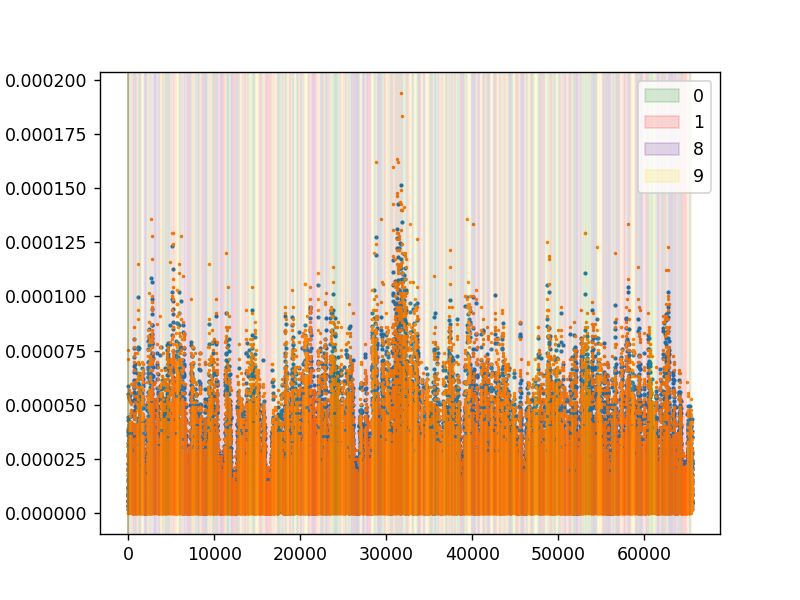

In [170]:
import matplotlib.pyplot as plt
c = {0:'g',1:'r',8:'indigo',9:'gold'}#0,1,8,9
chars = [0,1,8,9]
%matplotlib notebook
plt.scatter(np.arange(65536), data/np.sum(data), s=2)
plt.scatter(np.arange(65536), data1/np.sum(data1), s=1)

for x_0 in range(4):
    plt.axvspan(0,1, color = c[chars[x_0]], alpha = 0.15, label = str(chars[x_0]))
    
for x_0 in range(65536//128):
    plt.axvspan(x_0*128,(x_0+1)*128, color = c[in_data[x_0*128]], alpha = 0.05)
#plt.xlim(0, 2048)
plt.legend(loc='upper right')

<IPython.core.display.Javascript object>


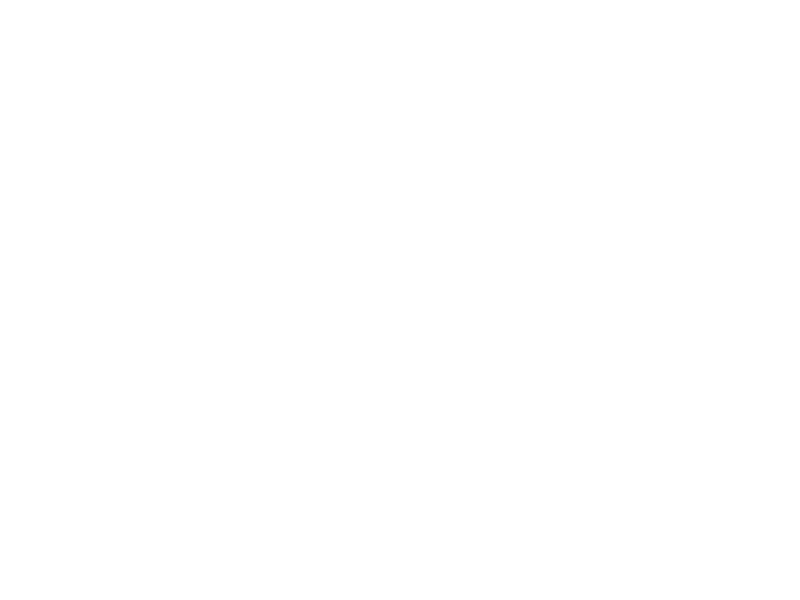

In [51]:
with open('./tmp(lab)/output-128', 'r') as f:
    out = list(map(int, list(f.read())))

data = np.zeros((65536))
for file in range(300):
    data = data + out[file*65536:(file+1)*65536]

import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(np.arange(65536), data, '.')

<IPython.core.display.Javascript object>


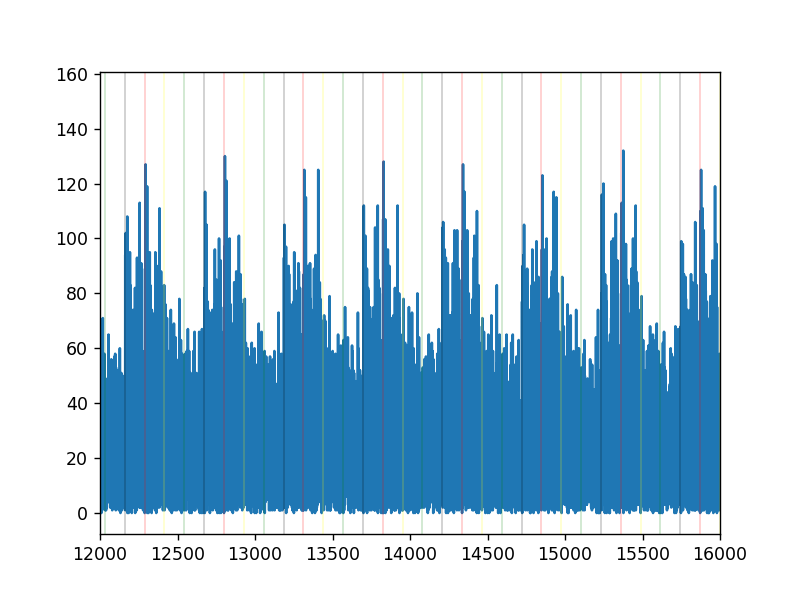

(12000.0, 16000.0)

In [52]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(np.arange(65536), data)
colors = ['red', 'yellow', 'green', 'black']
for x_0 in range(65536//128):
    #plt.plot(x_0*128, data[x_0*128+6], '.', linewidth=0.01, color='red')
    plt.axvline(x = x_0*128, color=colors[x_0%4], linewidth=0.2)
plt.xlim(12000,16000)

In [53]:
with open('./tmp(lab)/output-128', 'r') as f:
    out = list(map(int, list(f.read())))

with open('./tmp(lab)/seq-128', 'r') as f:
    req = list(map(int, list(f.read())))

In [54]:
corr = 0
n = 0
for file in range(300):
    for i in range(65536):
        if out[(65536*file)+i]==1:
            n+=1
            if req[i]==0 or req[i]==9:
                corr+=1
            else:
                corr-=1
corr/n

0.0995797648523224

In [55]:
np.shape(data)
#np.savetxt('data-128.csv', data)

(65536,)

In [66]:
data_files = np.zeros((300, 128*4))
for file_number in range(300):
    file = out[file_number*65536:(file_number+1)*65536]
    for block in range(65536//(128*4)):
        data_files[file_number]+=file[block*128*4:(block+1)*128*4]

<IPython.core.display.Javascript object>


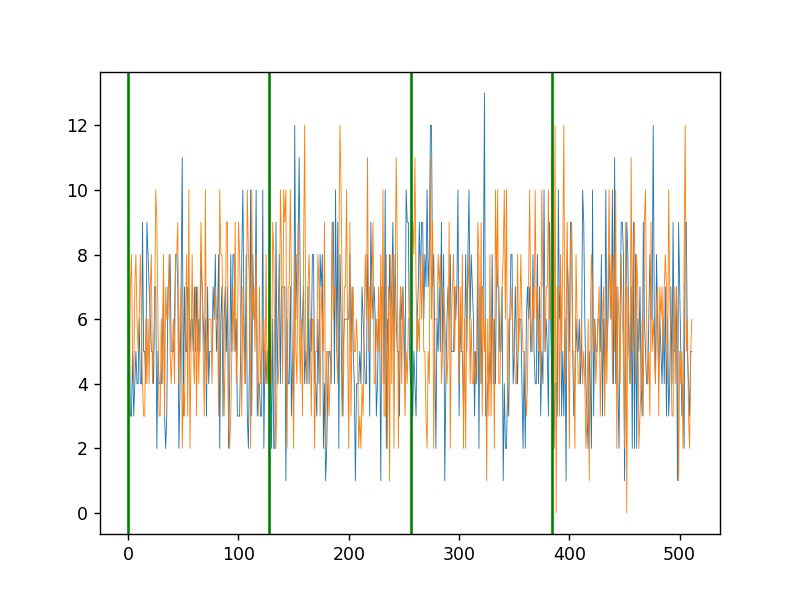

In [67]:
%matplotlib notebook
#data_sum = np.sum(data_files, axis=0)
for i in range(2):
    plt.plot(data_files[i], linewidth=0.5)
for block in range(4):
    plt.axvline(x=block*128, color='green')

In [58]:
for file in range(300):
    corr = 0
    n = 0
    for i in range(128*4):
        if data_files[file][i]>0:
            n+=data_files[file][i]
        if req[i]==0 or req[i]==9:
            corr+=data_files[file][i]
    print(corr/n, n)
    plt.plot(file, corr/n, '.')

0.5421747967479674 5904.0
0.5530944625407166 6140.0
0.545615162222936 6226.0
0.5483186418543912 6126.0
0.5578775510204081 6125.0
0.5473377569185952 6179.0
0.5422321571132045 6263.0
0.5495524296675192 6256.0
0.5529032258064516 6200.0
0.5493666774926924 6158.0
0.5478472786352558 6155.0
0.5470530771735591 6142.0
0.5620616538900669 6131.0
0.5460981749528006 6356.0
0.5454247294194818 6098.0
0.5559870550161812 6180.0
0.5377163728759727 6297.0
0.5452919173849406 6149.0
0.5476617239693662 6137.0
0.5556270096463023 6220.0
0.5492094223943208 6198.0
0.5399770152684288 6091.0
0.5508924264351182 6219.0
0.5497432605905006 6232.0
0.5586900129701686 6168.0
0.5535008692903429 6327.0
0.5457179652285898 6212.0
0.5503194888178914 6260.0
0.5400220160402579 6359.0
0.5480753999683193 6313.0
0.5495553759094584 6185.0
0.5500246426811237 6087.0
0.5466623460790667 6172.0
0.5445844632317755 6269.0
0.5514124293785311 6195.0
0.5509452098686318 6242.0
0.5618654822335025 6304.0
0.5494083786376719 6254.0
0.54434838296

<IPython.core.display.Javascript object>


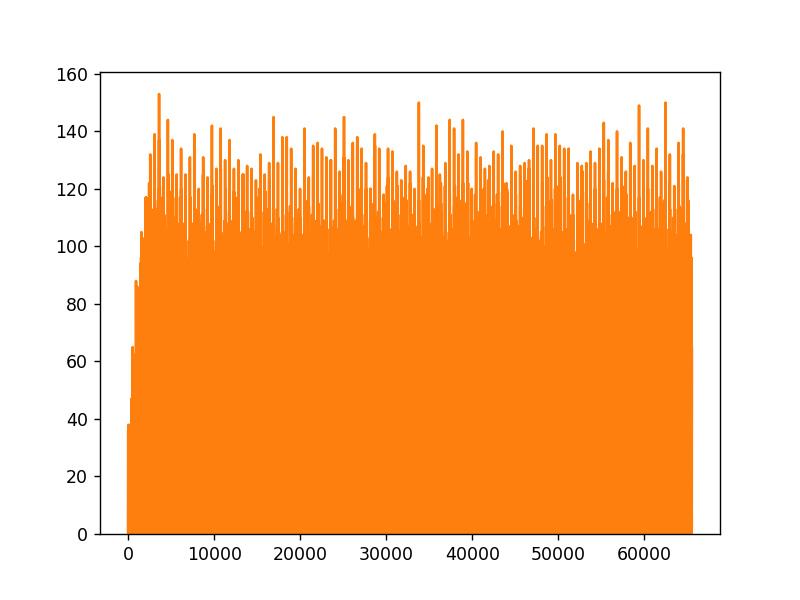

(array([46., 43.,  0., 22.,  0., 27.,  0., 27.,  0., 28.,  0., 25.,  0.,
        16.,  0., 19., 18.,  0., 18.,  0., 15.,  0., 10.,  0., 11.,  0.,
        10.,  0., 13.,  0., 17.,  0., 14., 11.,  0.,  9.,  0., 12.,  0.,
        11.,  0., 11.,  0., 12.,  0.,  7.,  0.,  7.,  0.,  6.,  5.,  0.,
         5.,  0.,  8.,  0.,  1.,  0.,  0.,  0.,  5.,  0.,  1.,  0.,  3.,
         0.,  3.,  1.,  0.,  1.,  0.,  3.,  0.,  0.,  0.,  5.,  0.,  1.,
         0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 0.  ,  0.53,  1.06,  1.59,  2.12,  2.65,  3.18,  3.71,  4.24,
         4.77,  5.3 ,  5.83,  6.36,  6.89,  7.42,  7.95,  8.48,  9.01,
         9.54, 10.07, 10.6 , 11.13, 11.66, 12.19, 12.72, 13.25, 13.78,
        14.31, 14.84, 15.37, 15.9 , 16.43, 16.96, 17.49, 18.02, 18.55,
        19.08, 19.61, 20.14, 20.67, 21.2 , 21.73, 22.26, 22.79, 23.32,
        23.85, 24.38, 24.91, 25.44, 25.97, 26.5 , 27.03, 27.56, 28.09,
        

In [59]:
%matplotlib notebook
plt.hist(data_files[0], bins=100)

In [65]:
with open('./tmp(lab)/output_1', 'r') as f:
    out = list(map(int, list(f.read())))

with open('./tmp(lab)/seq-8192', 'r') as f:
    in_data = list(map(int, list(f.read())))


    

<IPython.core.display.Javascript object>


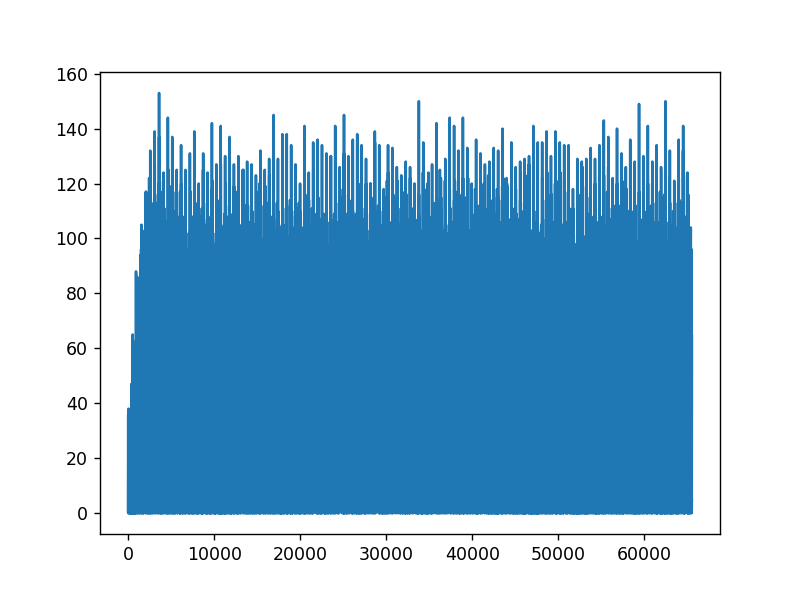

In [64]:
%matplotlib notebook
plt.plot(data)

# Длинный файл с 0

In [30]:
with open('./tmp(lab)/long-const-0-response', 'r') as f:
    data = np.array(list(f.read()))
print(data)
#in_data = np.ones_like(data)*0

['0' '0' '0' ... '' '' '']


In [32]:
set(data)
#len(data[data=='1'])

{'', '0', '1'}

<IPython.core.display.Javascript object>


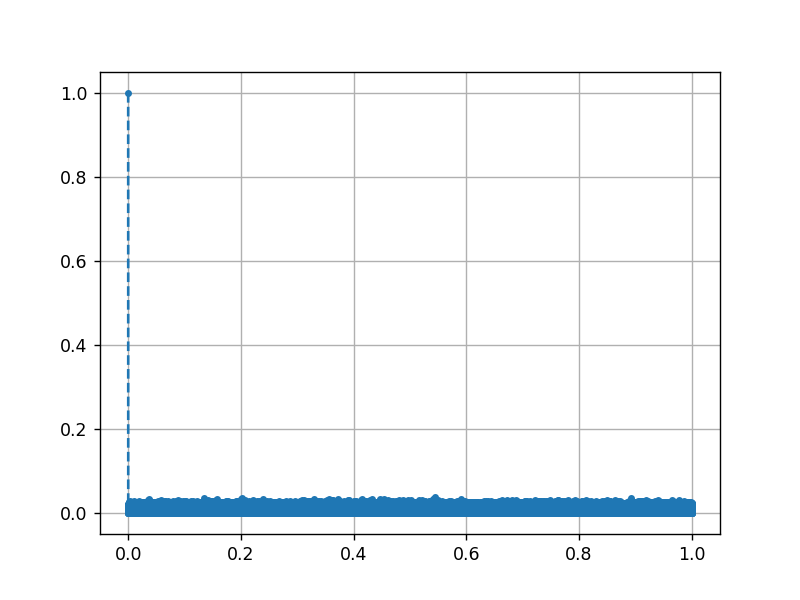

In [570]:
plt.figure()
fftdat = np.fft.rfft(datadata)
plt.grid()
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='full time avarage 8')

# Случайный блок 2048

In [33]:
with open('./tmp(lab)/2048-output', 'r') as f:
    out = list(map(int, list(f.read())))

data = np.zeros((65536))
for file in range(400):
    data = np.array(data + out[file*65536:(file+1)*65536])

with open('./tmp(lab)/random-2048', 'r') as f:
    in_data = np.array(list(map(int, list(f.read()))))

In [35]:
set(out)

{0, 1}

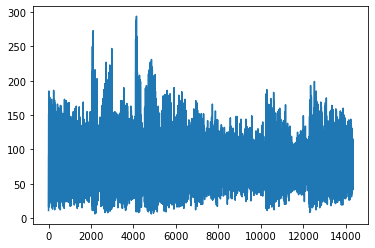

In [4]:
plt.figure()
plt.plot(data[in_data==0])

<IPython.core.display.Javascript object>


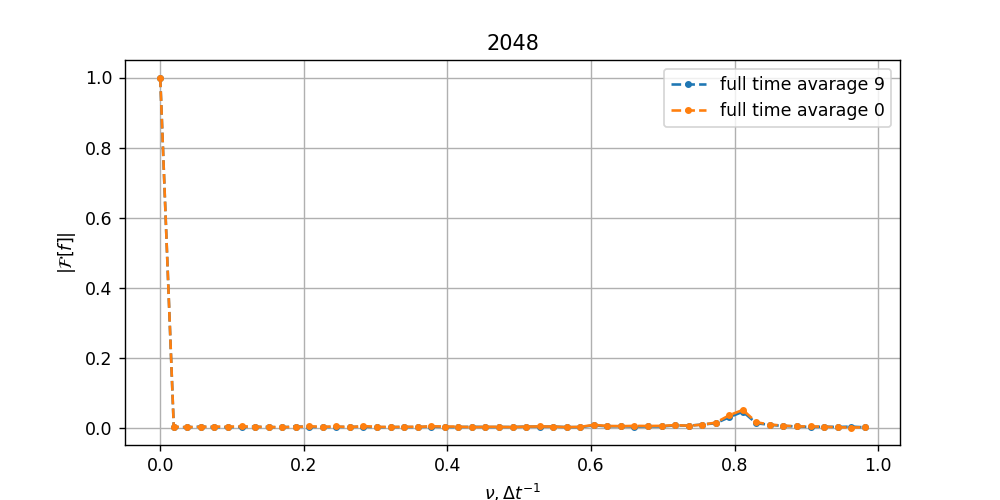

Text(0, 0.5, '$|\\mathcal{F}[f]|$')

In [7]:
%matplotlib notebook
plt.figure(figsize=(8,4))
plt.title('2048')
#datadata = data[11830: 11830+400]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='single stack')

datadata = np.mean(data[in_data==0].reshape(-1,128), axis=0)[15: 120]
fftdat = np.fft.rfft(datadata)
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='full time avarage 9')
plt.grid()

datadata = np.mean(data[in_data==9].reshape(-1,128), axis=0)[15: 120]
fftdat = np.fft.rfft(datadata)
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='full time avarage 0')

plt.legend()

plt.xlabel(r'$\nu, \Delta t^{-1}$')
plt.ylabel(r'$|\mathcal{F}[f]|$')
#
#datadata = data[13900:13900+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', c='red')
#
#datadata = data[10300:10300+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--')

#plt.yscale('log')

# Константа 0

In [57]:
with open('./tmp(lab)/long-const-0-response', 'r') as f:
    out = np.array(list(f.read()))[:-4048].astype(int)
with open('./tmp(lab)/long-const-0', 'r') as f:
    in_data = np.array(list(map(int, list(f.read()))))[:-4048]
    
with open('./tmp(lab)/DC-0-response', 'r') as f:
    out_DC = np.array(list(f.read()))[:1043584].astype(int)
with open('./tmp(lab)/DC-0', 'r') as f:
    in_data_DC = np.array(list(map(int, list(f.read()))))[:1043584]

In [56]:
1043677//128*128

1043584

<IPython.core.display.Javascript object>


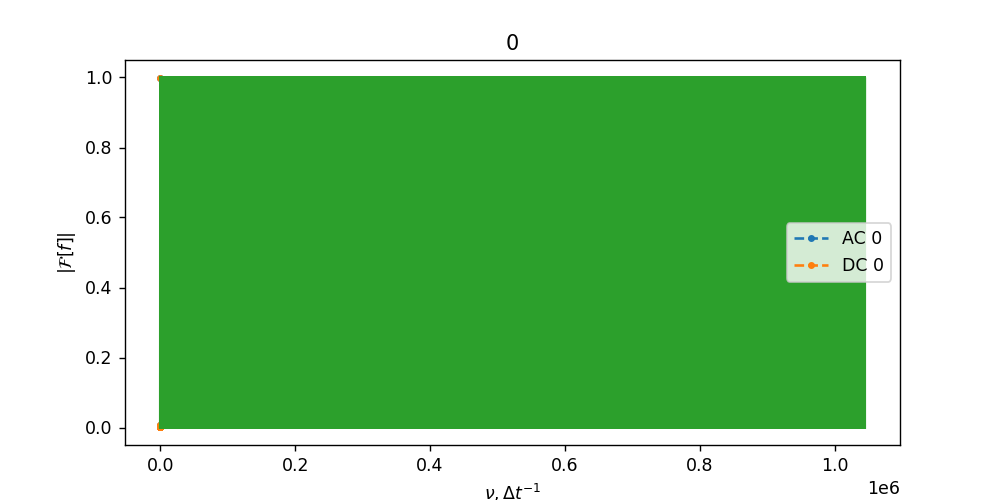

Text(0, 0.5, '$|\\mathcal{F}[f]|$')

In [59]:
%matplotlib notebook
plt.figure(figsize=(8,4))
plt.title('0')
#datadata = data[11830: 11830+400]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='single stack')
data=out[:1044480]
datadata = np.mean(data.reshape(-1,128), axis=0)
fftdat = np.fft.rfft(datadata)
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='AC 0')
plt.grid()

data=out_DC
datadata = np.mean(data.reshape(-1,128), axis=0)
fftdat = np.fft.rfft(datadata)
plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', label='DC 0')
plt.grid()

plt.legend()

plt.xlabel(r'$\nu, \Delta t^{-1}$')
plt.ylabel(r'$|\mathcal{F}[f]|$')
#
#datadata = data[13900:13900+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--', c='red')
#
#datadata = data[10300:10300+300]
#fftdat = np.fft.rfft(datadata)
#plt.plot(np.arange(len(fftdat))/len(fftdat), np.abs(fftdat)/np.abs(fftdat)[0],'.--')

#plt.yscale('log')

<IPython.core.display.Javascript object>


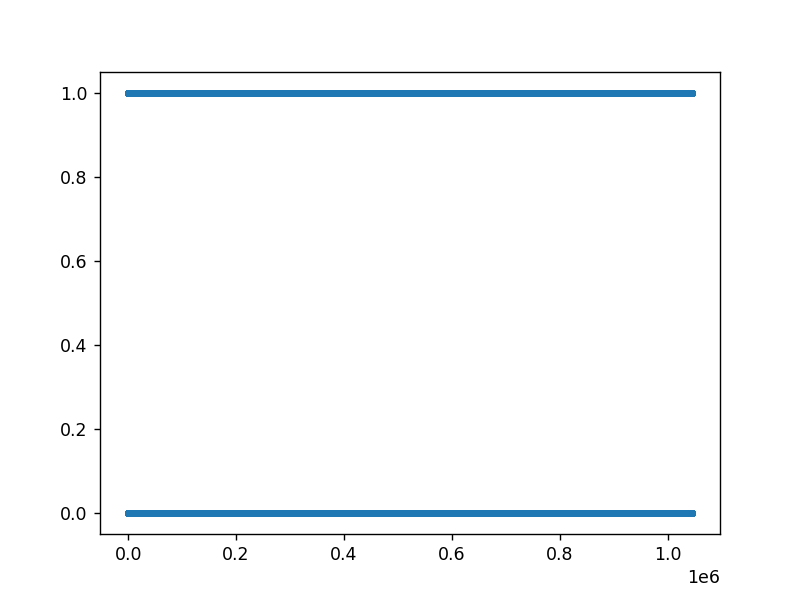

In [62]:
plt.figure()
plt.plot(out, '.')

(1015808,)


<IPython.core.display.Javascript object>


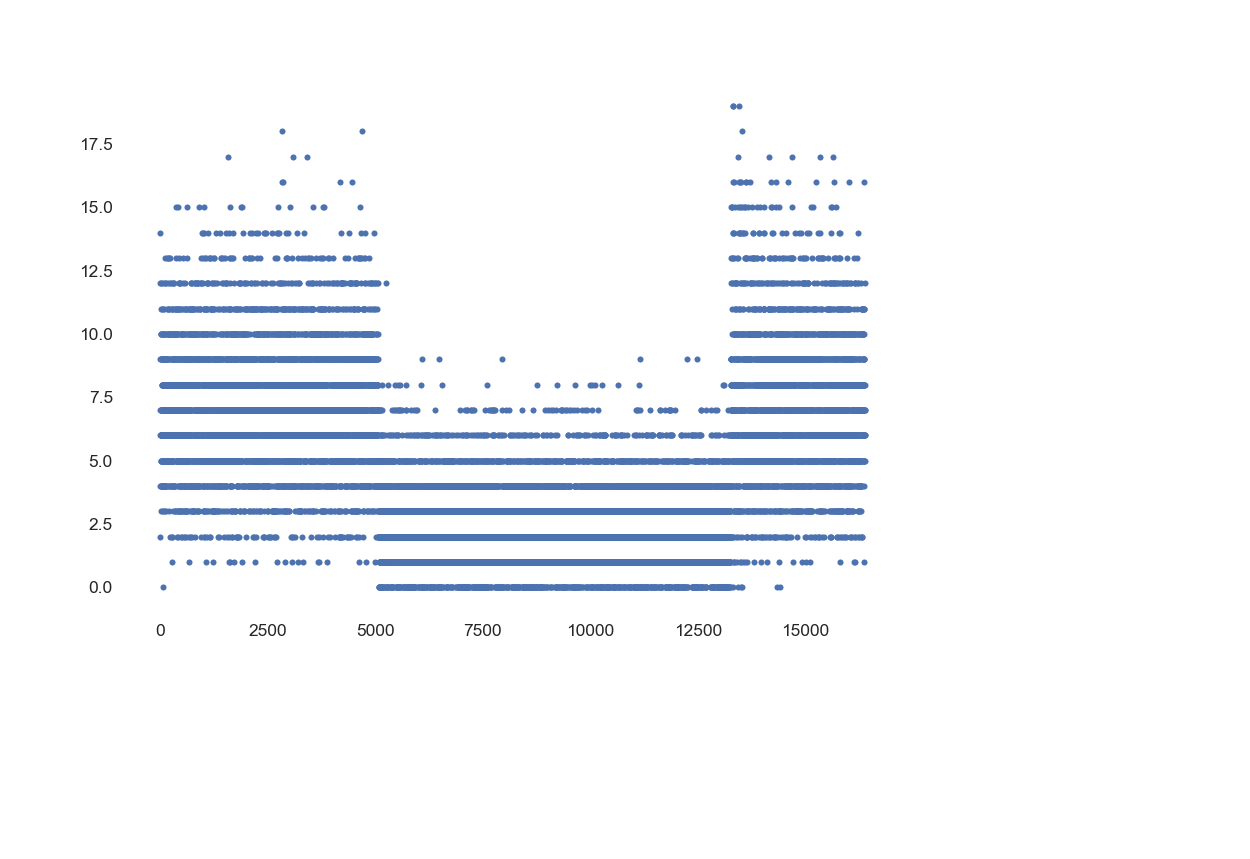

In [36]:
with open('./tmp(lab)/0-to-8-response', 'r') as f:
    out = list(map(int, list(f.read())[:62*16384]))

data = np.array(out)
datadata = np.sum(data.reshape(-1, 16384), axis=0)

import matplotlib.pyplot as plt
%matplotlib notebook
print(np.shape(out))
plt.plot(datadata, '.')
#plt.axvline(x = 16384//2, color='green')

In [110]:
np.shape(datadata)

(992, 1024)

In [111]:
datadata = data.reshape(-1, 1024)
len(np.sum(datadata, axis=1))

992

In [37]:
set(out)

{0, 1}

In [46]:
with open('./tmp(lab)/patt-response', 'r') as f:
    resp = list(map(int, list(f.read())[:62*16384]))
set(resp)

{0, 1, 2, 3}

In [47]:
count = np.unique(resp, return_counts=True)[1]
(count[2]+count[3])/(count[1]+count[3])

13.784553703312936

In [48]:
count

array([  198,    13, 60599,  4726], dtype=int64)

In [49]:
62/4

15.5